In [1]:
# The goal with this training exercise will be to produce visualizations of real-time COVID-19
# data that is being provided by usafacts.org (which is where the CDC
# gets their numbers)

# the structure of the program will be to 
# 1.  Read in and filter the data from the online repository
#  1a.  make a plot of the COVID cases per county for several different counties
# to show that un-normalized data can be misleading
# 2.  Calculate rate of increase per day, normalized to the county; and compute a running average of cases
# 2a.  make plots that take a random draw of counties and plots their normalized
#  cases over time
# 3a.  Compute higher order time derivatives of the plots to make a predictive model

# throughout the program will be comment parts the begin with "#advanced programming:" 
# these are ways to augment the program beyond its current capabilities; 
# as you progress through your training this summer, I encourage you to try and tackle 
# some of these advanced programming tasks to better your own knowledge

# we are going to use the pandas package to read in and store the data
# pandas is useful for when the data in your arrays is not entirely numerical
# you can go to the webURL https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
# to see where we're obtaining the data for this program

%reset -f   

            # this is a reset command that resets all of your variables and values
           # it's a good habit to put this at the beginning of all of your programs 
            # for when you need to run it from scratch; it effectively does the same thing 
            # as resetting the kernel but kernel resets should be used more for debugging
#restart()

In [2]:
# this cell contains all of my library imports; whether I use all of these libraries doesn't matter
# I'm putting here anything that I think I *might* use
# you can think of this first cell as your toolbox for solving the problem of this program
import csv # csv is a library that allows python to recognized Comma Separated Value files, which 
            # are arrays that store data in a particularly common format that we will be reading
import pandas as pd  # pandas is a special package that is designed to store and manipulate data
                    # in arrays very quickly and efficiently
import numpy as np  # good ol' numpy for all its array goodness
import datetime   # this is a special function that will allow us to translate the dates in the file, 
                # which are normally just read as numbers, into dates that can be read and understood
                # by the progrma as times
import matplotlib.pyplot as plt   # for access to plotting tools

pd.set_option('display.min_rows', 15) # this is an option I'm setting to control the output rows we display 
pd.set_option('display.max_rows', 30) # in the notebook; since the dataset is much larger than we should ever 
                    # display all at once, we can control how many rows are output with a command like this
                            

In [3]:
# this cell reads in COVID-19 data from a URL
# you should go to this URL to see what the data looks like before reading it into your program

# when reading in data from a table using pandas, there are special read functions
# to handle files that are in various formats;  the format of the data we're looking at is csv
# which is the default output from excel spreadsheets; csv stands for "comma separated values"
# meaning that every element in the array is separated by a comma

# by default, the pandas function "read_csv" will assume that the first line in the file 
# is the header information from the columns in the data file, the header contains information 
# we want as header info, but it also contains dates which are actual data we want to store 
# and work with, not just keep as header information 

# since the header contains data we need, and the default for the read function expects a header 
# row, then we need to tell the read runction not to read it in as a normal header, so we 
# set the option (header=None) in the function argument, after the URL

# each object that is created below (cases, cases_h, pop, and deaths) can be thought of as an array, but it
# is more precisely a PANDAS DATAFRAME; a dataframe is like an array with extra info that pandas
# uses to speed up all operations we do with that array; so, in this example, I will refer
# to our data array as a dataframe, but for visualizing them in your mind, they are effectively
# the same thing as a normal array

# here i'm reading in the data without the header
# this file contains the number of cases over time separated by county, which is the data
# I'm going to start with

# here is the function call that grabs the data without the header (keyword argument header=None)
cases = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv',
    header=None)

# here i'm reading in the data with the header; though we will be working primarily with the cases dataframe 
# data, which does not contain the formatted header info we will also be using cases_h at some point 
# to take advantage of how Pandas stores info (you'll see why I'm doing this later); since I'm reading 
# the header info, and some of that information is dates, I'm putting in a special option so that it 
# doesn't think those are just numbers (parse_dates=True)
cases_h = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv',
    parse_dates=True)

# the above function calls will get the most recent data from that site.  if the site url or data format
# changes, then the above call will have to be changed

# pop is for reading in the population of each county; uncomment this function call when you get to the point
# in the program where it tells you to compute per capita data
#pop = pd.read_csv(
#    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')

# deaths is for reading in the confirmed covid deaths; uncomment this function call when you're ready to 
# to face the reaper and do some death analysis
#deaths = pd.read_csv(
#    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv')

np.shape(cases) # here is the shape of the dataframe that the data created; the format is rows, columns
                # there should be around 3196 rows (1 for each county in the US), and some number of columns
                # in the hundreds, which are the number of days since data collection began

/Users/david/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,2

(3194, 493)

In [4]:
np.shape(cases_h)   # notice that cases_h, the one that read the header and kept it in the header, rather 
                    # than moving the header info into the array, has one fewer row than the cases dataframe

(3193, 493)

In [5]:
# a summary output of how pandas sees the data stored in cases
# the data that's contained in this file is the cumulative number of cases reported
# each day in that county
cases

#cases_h
#uncomment the above line to see what cases_h looks like with the header info; be sure you can see the difference
# between cases and cases_h

,0,1,2,3,4,5,6,7,8,9,...,483,484,485,486,487,488,489,490,491,492
0,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24
1,0,Statewide Unallocated,AL,01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001,Autauga County,AL,01,0,0,0,0,0,0,...,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118
3,1003,Baldwin County,AL,01,0,0,0,0,0,0,...,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554
4,1005,Barbour County,AL,01,0,0,0,0,0,0,...,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328
5,1007,Bibb County,AL,01,0,0,0,0,0,0,...,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659
6,1009,Blount County,AL,01,0,0,0,0,0,0,...,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,56033,Sheridan County,WY,56,0,0,0,0,0,0,...,3179,3179,3182,3184,3184,3187,3191,3191,3191,3193
3188,56035,Sublette County,WY,56,0,0,0,0,0,0,...,790,790,791,791,791,791,791,791,791,792


In [6]:
# Since each row is a different county, I can access data for a specific county 
# by selecting a full row; in a pandas dataframe, a full row is not just the index of the row, it is a range
# writing cases[108:109] will show me all of index 108 for this pandas dataframe, 
# which is Maricopa County in Arizona
#cases[108:114]  # if you want to print a range of cases

temp = cases_h.loc[cases_h['County Name']=='Maricopa County']  # if 
printtemp

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24


In [7]:
# the format of the dataframe contains time series data in columns and different counties in rows
# the default format for time series data used in pandas is to have
# each different time in rows, then different counties in columns
# so our first task is to reshape our input dataframe to interchange the xy axes
# essentially just swapping our rows and columns

# we can use the function "transpose" to interchange the axes of our dataframe
# this way, the dates will be in the rows as pandas likes them
t_cases = cases.transpose();

t_cases   # now my axes have been switched


#advanced programming
#instead of transposing the array, try to create a new dataframe here that puts it in the form you
# want by using the pandas "pivot" function

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
0,countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1,County Name,Statewide Unallocated,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
2,State,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
3,StateFIPS,01,01,01,01,01,01,01,01,01,...,56,56,56,56,56,56,56,56,56,56
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,2021-05-18,0,7015,21444,2322,2651,6794,1233,2190,14580,...,161,2779,633,3184,791,4384,3771,2249,917,651
487,2021-05-19,0,7017,21467,2324,2652,6808,1233,2191,14586,...,161,2779,633,3184,791,4384,3771,2249,917,651


In [8]:
# the first 4 rows in our transposed dataframe are just header information
# the data to be plotted is all contained after row 4 and can be selected by county

# for all of the data I'm going to plot, I'll need the same range of dates for each
# so here's how I isolate those into a variable I'm calling dates


#dates = t_cases[0][4:]; 
dates = pd.to_datetime(t_cases[0][4:])  # a couple of things here:  "to_datetime" is a pandas 
                    # function that converts the input
                    # into a time-like object that pandas can easily read/manipulate;  t_cases[0][4:] is a special 
                    # way of formatting an array call (called a 'slice') so that it only displays a subset of the 
                    # data; in this case, I'm selecting [0] for the first index, 
                    # meaning the first column in the dataframe t_cases, 
                    # and [4:] to say that I want to start with the 4th index (meaning the fifth row) and then 
                    # read all of those values as dates; 
                    # so in summary, I'm just picking out the dates from the array


t_cases[0][4:]  # here is what the subset of the dataframe looks like with the selection [0][4:] that I made above

# to select a specific column x, we use t_cases[:][x]; so for Maricopa 
#t_cases[:][108]

# if we want it without the header info, use t_cases[4:][108]
#t_cases[4:][108]


# advanced programming:  go through and edit above this cell to request and store a user selected list of counties
# to compare against one another

4      2020-01-22
5      2020-01-23
6      2020-01-24
7      2020-01-25
8      2020-01-26
9      2020-01-27
10     2020-01-28
          ...    
486    2021-05-18
487    2021-05-19
488    2021-05-20
489    2021-05-21
490    2021-05-22
491    2021-05-23
492    2021-05-24
Name: 0, Length: 489, dtype: object

In [9]:
# and here is what pandas sees now that we've told it to interpret those as dates
# notice that the information is the same, but the format has changed
# also, the datatype (dtype) has now changed from an 'object' to 'datetime64', which is the special 
# time format that pandas likes
dates

4     2020-01-22
5     2020-01-23
6     2020-01-24
7     2020-01-25
8     2020-01-26
9     2020-01-27
10    2020-01-28
         ...    
486   2021-05-18
487   2021-05-19
488   2021-05-20
489   2021-05-21
490   2021-05-22
491   2021-05-23
492   2021-05-24
Name: 0, Length: 489, dtype: datetime64[ns]

In [10]:
# Now, our goal with this program is to use the larger dataset in t_cases to make plots 
# of individual counties over time.  
# initially, we'd like to take an arbitrary number of counties that we define, compute the per-capita total 
# COVID cases, and plot those all together over the same time range 

# advanced programming:  take a user defined set of counties, compute and plot the 2,5, and 9 day running 
# averages over the same time range, along with their associated errors


# So, if we can write our program to extract and plot 1 arbitrary county from the dataframe
# then we just iterate over some list of counties in order to produce a plot with 
# multiple counties

# In order to do this with Pandas, we have to recognize that the format the 
# data was read in, is not the format Pandas prefers.
# Pandas and all its time functionality seem built around the idea of 
# the time series being all in one column

# our case was further complicated by the fact that some of the data (namely the dates), 
# are being stored in the header, rather than in the frame itself
# to get around this, we've used the read-in method to put the header information into the dataframe itself, 
# rather than just in the header, and transposed that dataframe so that the dates are now in the first column

# in extracting the data for a county, it will ultimately be easier to reorganize, 
# or recreate our dataframe so that it only has a "date" column, and a value column

# So, let's try to create a new data frame here
# it should have dates as rows in the first column
# it should have county_FIPS (a unique  identifier for each county) as columns in the first row
# it should have the values for each county and each date in the rest of the array

In [11]:
# Making a new data frame

# we created dates above, which will serve as one column in our new dataframe

# for the other columns, which show each counties numbers, 
# we want all but the first (since the first column contained the dates)
# we can do this by using the .loc and .iloc functions, which are two very fast methods
# for sifting through data; any dataframe can use the loc functions (like t_cases here)
# the difference between .loc and .iloc is that .loc is intended to be used for column/label data
# whereas .iloc is used for integer values within the dataframe

# the main reason that they are different is that pandas is a specifically programmed package to do things
# with dataframes very quickly, and especially so for specific datatypes within that dataframe
# since our # of cases, population, and deaths data are all integers, it makes sense to 
# utilize this extra efficient method provided by pandas

# as an argument loc wants to know what data within the frame you'd like to select.  it then stores the location
# of the data, rather than the data itself, so that anytime I want to use that data
# I can just point to it with the variable t_cases_cols defined below

# type t_cases.columns[1:] in a separate execution cell to see what kind of object it produces

#t_cases_cols = t_cases.columns[1:]

t_cases_cols = t_cases.loc[0,1:56037] # here, my values in brackets are stating what 
                        # data I want.  The first coordinate, 0, says to start with the first row
                        # (which is where all of the county IDs are stored)
                        # and go from the second column all the way to the end 
                        #  going over list of county IDs from beinning to end,
                        #  the numbering is not linear. the county IDs go up to 56037
                        # but there are only about 3200 counties total
#t_cases_cols = t_cases[0]
#t_cases_cols

# so we've got our dates as rows, our counties as columns, and now we want the array to be 
# populated with the data for each date and county

# to accomplish this, I'm going to use a function called iloc, which like .loc above, stores only the 
# positions of the data in the dataframe, without moving, or modifying the values themselves.  
# accidently modifying array values is a common 
# issue that happens with beginner programmers, and so using iloc help to prevent that from occuring

cts = t_cases.iloc[4:,1:]; # in the function call for iloc, it wants a range of rows and columns 
                            # from which to store the location info; so I've chosen [4:,1:] to select 
                            # the data that starts in the 5th row (index [4:]), and the second column
                            # (index [1:])
                            # it's important to note here that this method of slicing creates a new 
                            # dataframe from t_cases.  Since t_cases is a dataframe itself
                            # I found that I needed to recast it later as a 2D numpy array 
                            # before then recombining it with the other info to make my new dataframe
            

# with all 3 of these variables (dates, t_cases.columns, and cts)
# I can now reassemble my data into a pandas dataframe


In [12]:
# need to check data type of the list we just created
cts.dtypes 

1       object
2       object
3       object
4       object
5       object
6       object
7       object
         ...  
3187    object
3188    object
3189    object
3190    object
3191    object
3192    object
3193    object
Length: 3193, dtype: object

In [13]:
# it says the data are all type 'object', which is sort-of a pandas catch all data type
# if we want to be able to work with the data in any way, it's preferable to be more specific
# as to what the data type really is; in this instance, number of cases is an intenger value
# so we should change the dataype in the cts thusly: 
cts = cts.astype(int)
cts.dtypes
#cts

1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
        ...  
3187    int64
3188    int64
3189    int64
3190    int64
3191    int64
3192    int64
3193    int64
Length: 3193, dtype: object

In [14]:
# since I'm going to be creating a data frame, I need to ensure that all of the dimensions match up
# in particular, I want the shape of dates to be all rows, the shape of t_cases_cols to be all columns, 
# and the shape of cts to have "dates" number of rows, and "t_cases_cols" number of columns

dates.shape, t_cases_cols.shape, cts.shape, 

((489,), (3193,), (489, 3193))

In [15]:
# the data types don't need to match up, but it's sometimes helpful to know what they are, since pandas
# treats different data types differently in its operations 
# if you want to check the datatypes, you can uncomment the below statement
#print(dates.dtypes,"\n\n",cts.dtypes,"\n\n",t_cases_cols)  # the "\n" is how you force it to print a new line

In [16]:
# here is where I recast my dataframe cts, as a numpy array, which I'm then going to stick into my custom-made
# data frame for plotting
# cast data frame as numpy array
ncts= cts.to_numpy()

<AxesSubplot:xlabel='0'>

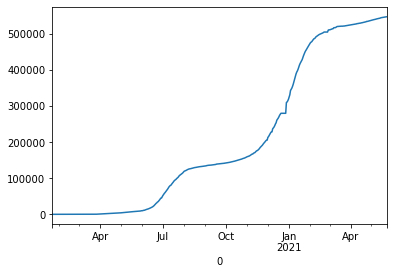

In [17]:
# now I'm using the DataFrame function to create my custom dataframe
# first input is the values in the numpy array ncts, second input is the rows, third input is the columns
new_df = pd.DataFrame(ncts,index=dates,columns=t_cases_cols)

#new_df  # if you want to output the resulting dataframe, uncomment this line

# at this point you could also just plot the data for any given county if you know 
# which column in the dataframe it's located
# for example, Maricopa county has countyFIPS = 4013 in our new data frame, which I can plot thusly
plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object
new_df['4013'].plot() # the part in brackets is calling a specific column that is named '4013'

#new_df.dtypes  # here are the datatypes in our new frame that we are going to be plotting


In [18]:
# after you get all of this, move on to part 2